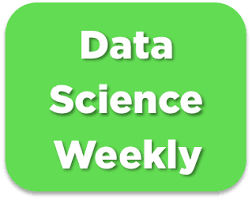

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff


# Read file with labels

In [12]:
data = pd.read_csv('/Users/qxzjy/vscworkspace/dsfs-ft-34/ml_module/project/data/conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [13]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [ ]:
print(data.country.value_counts())
print()
print(data.age.value_counts())
print()
print(data.new_user.value_counts())
print()
print(data.source.value_counts())
print()
print(data.total_pages_visited.value_counts())
print()
print(data.converted.value_counts())

country
US         160124
China       69122
UK          43641
Germany     11693
Name: count, dtype: int64

age
28     12972
30     12956
29     12710
27     12668
26     12525
31     12327
25     12157
32     12111
24     11647
33     11392
23     11097
34     10911
22     10471
35     10352
21      9870
36      9668
20      9131
37      8773
19      8452
38      8067
18      7662
39      7343
17      6825
40      6451
41      5783
42      5029
43      4423
44      3808
45      3249
46      2693
47      2255
48      1898
49      1467
50      1213
51       990
52       835
53       571
54       459
55       352
56       251
57       211
58       147
59       115
60        86
61        63
62        50
63        29
64        26
65        14
66         9
67         5
68         2
70         2
111        1
72         1
69         1
73         1
79         1
123        1
77         1
Name: count, dtype: int64

new_user
1    195066
0     89514
Name: count, dtype: int64

source
Seo       13947

# Explore dataset

In [14]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

In [32]:
country = data.groupby("country")["converted"].mean()
px.bar(country)

In [ ]:
age = data.loc[data["age"] < 100,:].groupby("age")["converted"].mean()
px.bar(age)

In [36]:
new_user = data.groupby("new_user")["converted"].mean()
px.bar(new_user)

In [37]:
total_pages_visited = data.groupby("total_pages_visited")["converted"].mean()
px.bar(total_pages_visited)

In [38]:
source = data.groupby("source")["converted"].mean()
px.bar(source)

In [26]:
fig = px.scatter_matrix(data_sample)

fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height=800, width = 800)

fig.show()

In [24]:
corr_matrix = data_sample.apply(lambda x : pd.factorize(x)[0]).corr().round(2)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())

fig.show()